In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
df = pd.read_excel('https://query.data.world/s/ci5mddusiml22vztgszqwv273wedtm')

In [52]:
df.head()

,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
0,1051,UNIVERSITY OF ALABAMA,TUSCALOOSA,AL,35487.0,Public,Subsidized,7594,7622,33040862,7622,16774054
1,1052,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,AL,35294.0,Public,Subsidized,4272,4352,18590061,4352,9058344
2,1009,AUBURN UNIVERSITY,AUBURN,AL,36849.0,Public,Subsidized,4504,4504,19474542,4535,10142490
3,1057,UNIVERSITY OF SOUTH ALABAMA,MOBILE,AL,36688.0,Public,Subsidized,3438,3487,15061071,3487,7557853
4,1047,TROY UNIVERSITY,TROY,AL,36082.0,Public,Subsidized,4334,4355,18467508,4355,7395839


In [53]:
df.describe()

,OPE ID,Zip Code,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
count,42740.000000,33650.000000,42740.000000,42740.000000,4.274000e+04,42740.000000,4.274000e+04
mean,16201.447824,50746.311738,3798.421385,3909.581844,3.379861e+07,3974.820660,1.694132e+07
std,15479.494190,29313.943341,16547.929427,17095.803201,1.666734e+08,17393.746307,8.551740e+07
min,1002.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,2848.000000,27410.000000,6.000000,7.000000,3.383300e+04,7.000000,1.700000e+04
50%,8447.500000,49003.000000,130.000000,132.000000,8.019415e+05,137.000000,3.912990e+05
75%,30837.000000,77003.000000,1287.000000,1318.250000,8.253579e+06,1350.000000,4.020021e+06
max,42933.000000,99801.000000,776959.000000,798927.000000,7.191430e+09,798927.000000,3.629214e+09


In [54]:
df2 = df.groupby(['State'])

In [56]:
df3 = df.groupby(['State'])['School']

In [57]:
school_by_state = df3.count()

The following graph shows the amount of schools in each state

<AxesSubplot:title={'center':'Amount of Schools located in each State'}, xlabel='State', ylabel='Amount'>

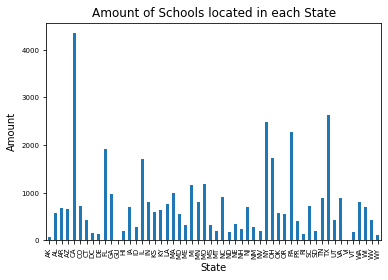

In [58]:
school_by_state.plot(ylabel='Amount', fontsize=7, label='Inline label', kind='bar', title='Amount of Schools located in each State')


In [59]:
school_by_state

State
AK      60
AL     580
AR     670
AZ     650
CA    4350
CO     710
CT     420
DC     150
DE     120
FL    1910
GA     970
GU      10
HI     200
IA     700
ID     280
IL    1710
IN     810
KS     600
KY     630
LA     760
MA    1000
MD     560
ME     310
MI    1160
MN     810
MO    1180
MS     320
MT     200
NC     900
ND     180
NE     340
NH     240
NJ     690
NM     270
NV     190
NY    2490
OH    1720
OK     570
OR     540
PA    2270
PR     400
RI     140
SC     720
SD     200
TN     880
TX    2620
UT     420
VA     890
VI      10
VT     170
WA     810
WI     690
WV     420
WY     100
Name: School, dtype: int64

In [60]:
school_by_state.max()

4350

In [134]:
school_by_state.min()

10

In [135]:
school_by_state.mean()

753.7037037037037

In [136]:
school_by_state.sum()


40700

In [137]:
school_type = df.groupby(['School Type'])['# of Loans Originated']

In [138]:
st= school_type.count()

In [139]:
st

School Type
Foreign-For-Profit       90
Foreign-Private         530
Foreign-Public         1420
Private-Nonprofit     14100
Proprietary           14020
Public                12580
Name: # of Loans Originated, dtype: int64

<AxesSubplot:title={'center':'Amount of loan disbursments per School Type'}, xlabel='School Type'>

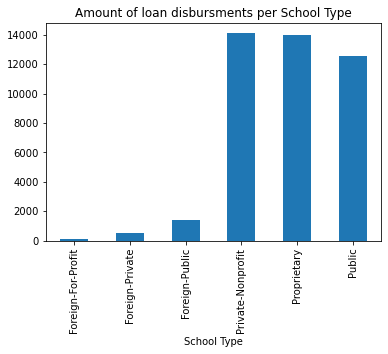

In [140]:
st.plot(kind='bar', title='Amount of loan disbursments per School Type')

The above graph show that loan disbursments are similar between School Types.

I am only interested in looking at a few of the columns, so I will make a new data frame with the information I want: 'School','School Type','# of Disbursements','$ of Disbursements'. 

In [68]:
amount_of_loans = df[['School','School Type','# of Disbursements','$ of Disbursements']]

I am also only interested in the United State based schools so I will go through the data and filter for those types. I will also add up how many loans they disburse and for how much so i can compare the data by type.       

In [86]:
private = 0
nonprofit = 0
public = 0

private_dis = 0
nonprofit_dis = 0
public_dis = 0

for i in range(len(amount_of_loans)):
    if amount_of_loans.loc[i, "School Type"] == 'Public':
        x = amount_of_loans.loc[i, '# of Disbursements']
        public += x
        y = amount_of_loans.loc[i, '$ of Disbursements']
        public_dis += y
    if amount_of_loans.loc[i, "School Type"] == 'Private-Nonprofit':
        x = amount_of_loans.loc[i, '# of Disbursements']
        nonprofit += x
        y = amount_of_loans.loc[i, '$ of Disbursements']
        nonprofit_dis += y 
    if amount_of_loans.loc[i, "School Type"] == 'Proprietary':
        x = amount_of_loans.loc[i, '# of Disbursements']
        private  += x
        y = amount_of_loans.loc[i, '$ of Disbursements']
        private_dis += y 
    

In [95]:
public_mean = public_dis/public

In [96]:
private_mean = private_dis/private

In [97]:
nonprofit_mean = nonprofit_dis/nonprofit

In [182]:
number_of_disbursements = [nonprofit, private, public]
money_amount_of_disbursements = [nonprofit_dis, private_dis, public_dis]
average_disbursements = [nonprofit_mean, private_mean, public_mean]
index = ['Private-Nonprofit', 'Proprietary', 'Public' ]
df7 = pd.DataFrame({'# of Disbursements':number_of_disbursements,
                    '$ of Disbursements':money_amount_of_disbursements, 
                    'Average per Disbursement':average_disbursements}, index = index)

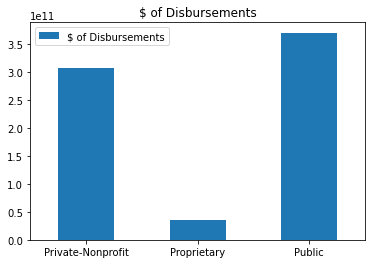

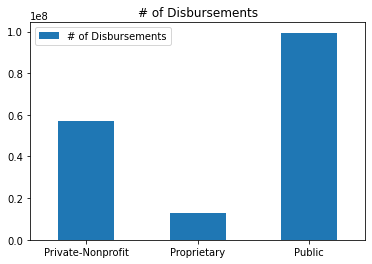

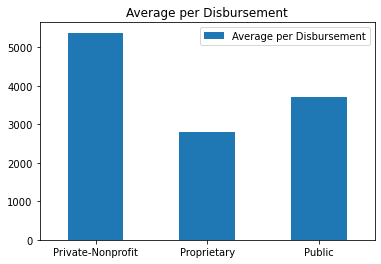

In [183]:
ax = df7.plot.bar(rot=0, y  = '$ of Disbursements', title = '$ of Disbursements' )
ax2 = df7.plot.bar(rot=0, y ='# of Disbursements', title = '# of Disbursements' )
ax1 = df7.plot.bar(rot=0, y ='Average per Disbursement', title = 'Average per Disbursement' )

The above graph show that even though public schools have a higher amount of loans per school, and disburse the most money, the public schools average is lower than Private-Nonprofits which has the highest average out of the three type of schools. 

Proprietary schools have the smallest number of loans and the least amount of money disbursed. They also have the lowest average of the three types of schools. 

From this data we can tell Private-Nonprofits students take out higher loans on average compared to the other school types. Proprietary schools take out the least on average.

We do not have information on how much the school types cost on average or how much in scholarships and/or grants were given out. Private-Nonprofit schools being more costly might explain the higher average. 